# Classification

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_dataset.csv')

In [3]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


C:\Users\GANPATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


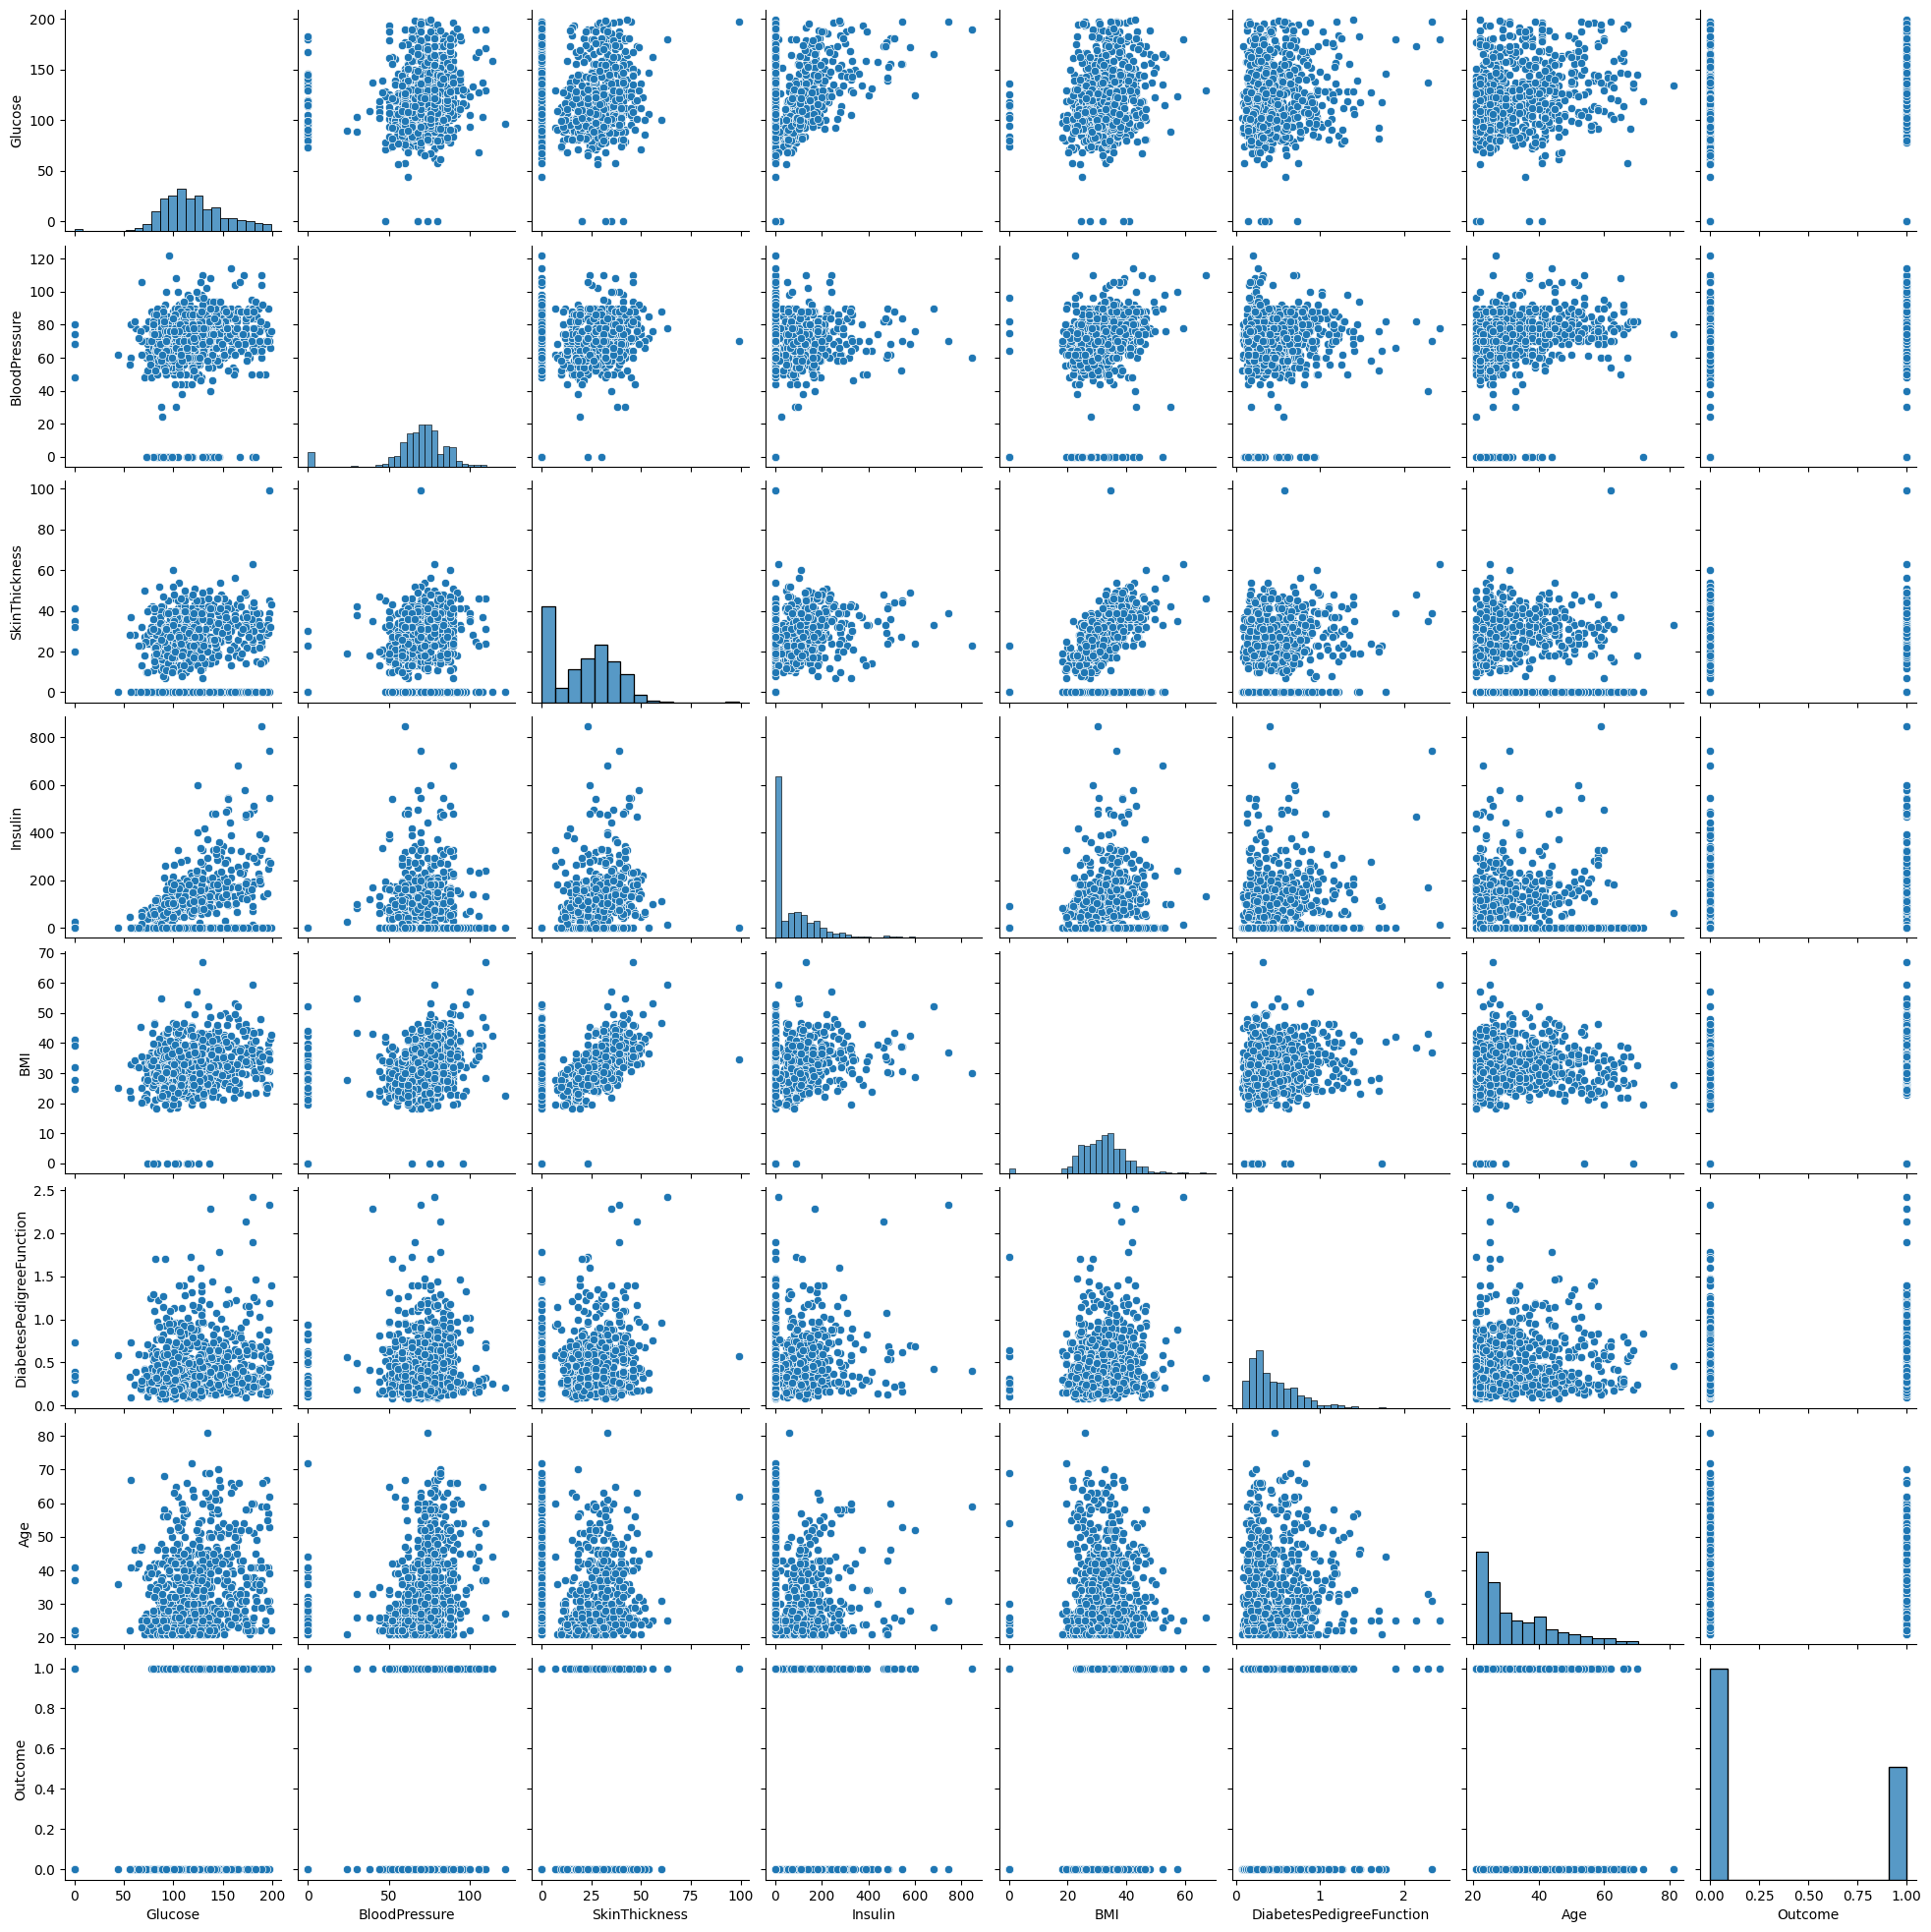

In [7]:
sns.pairplot(df)

Seperating the Features and Target values

In [8]:
x = df.iloc[:,0:7]
y = df.iloc[:,-1]

Splitting the training and the Test dataset

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [10]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
31,158,76,36,245,31.6,0.851,28
223,142,60,33,190,28.8,0.687,61
494,80,0,0,0,0.0,0.174,22
568,154,72,29,126,31.3,0.338,37
612,168,88,42,321,38.2,0.787,40
...,...,...,...,...,...,...,...
551,84,68,30,106,31.9,0.591,25
6,78,50,32,88,31.0,0.248,26
640,102,86,17,105,29.3,0.695,27
693,129,68,49,125,38.5,0.439,43


## Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
LogReg = LogisticRegression(random_state=0)

In [13]:
LogReg

LogisticRegression(random_state=0)

In [14]:
LogReg.fit(x_train,y_train)

C:\Users\GANPATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [15]:
y_pred = LogReg.predict(x_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
log_reg_score = accuracy_score(y_test,y_pred)

In [18]:
log_reg_score

0.7922077922077922

### Confusion Matrix

In [19]:
confusion_matrix(y_test,y_pred)

array([[136,  23],
       [ 25,  47]], dtype=int64)

### AUC

In [20]:
auc = roc_auc_score(y_test,y_pred)
auc

0.7540618448637316

#### ROC

In [21]:
from sklearn.metrics import roc_curve

In [22]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

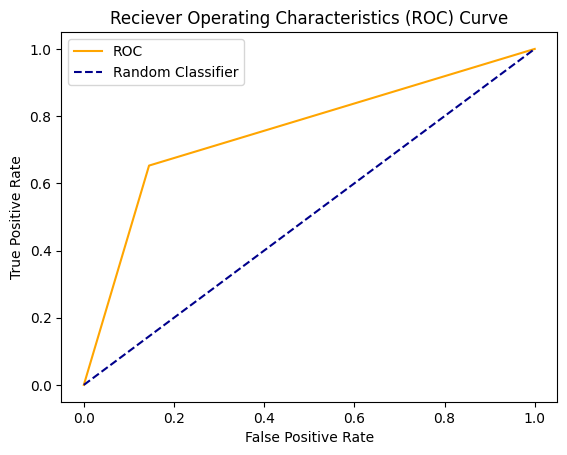

In [23]:
plt.plot(fpr,tpr,color = 'orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle= '--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

# kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k = 20

kNN_model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=20)

In [26]:
y_pred2 = kNN_model.predict(x_test)

In [27]:
knn_accuracy = accuracy_score(y_test,y_pred2)
print("Train Accuracy score for kNN classifier for k= 20 is ",accuracy_score(y_train,kNN_model.predict(x_train)))
print("Test Accuracy score for kNN classifier for k= 20 is ",knn_accuracy)

Train Accuracy score for kNN classifier for k= 20 is  0.7616387337057728
Test Accuracy score for kNN classifier for k= 20 is  0.7662337662337663


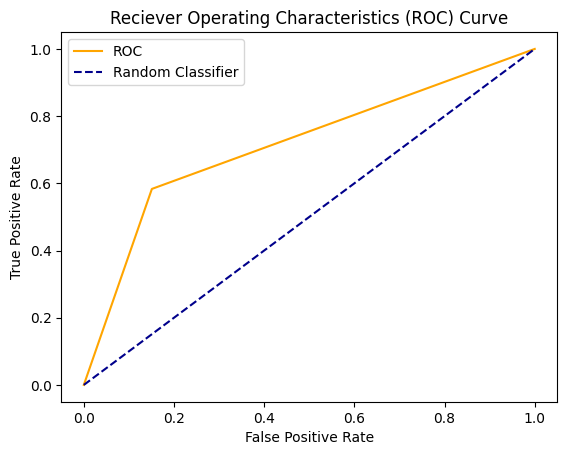

In [28]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)
plt.plot(fpr,tpr,color = 'orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle= '--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [29]:
auc = roc_auc_score(y_test,y_pred2)
auc

0.7161949685534592

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [32]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dt_y = dt.predict(x_test)
print("Accuracy score for training - ",accuracy_score(y_train,dt.predict(x_train)))
print("Accuracy score for test - ",accuracy_score(y_test,dt_y))
      

Accuracy score for training -  1.0
Accuracy score for test -  0.696969696969697


In [34]:
confusion_matrix(y_test,dt_y)

array([[118,  41],
       [ 29,  43]], dtype=int64)

## Naïve Bayes 

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()

In [38]:
nb

GaussianNB()

In [39]:
nb.fit(x_train,y_train)

GaussianNB()

In [40]:
nb_y = nb.predict(x_test)
print("Accuracy score for training - ",accuracy_score(y_train,nb.predict(x_train)))
print("Accuracy score for test data - ",accuracy_score(y_test,nb_y))

Accuracy score for training -  0.7523277467411545
Accuracy score for test data -  0.7878787878787878


In [41]:
confusion_matrix(y_test,nb_y)

array([[135,  24],
       [ 25,  47]], dtype=int64)

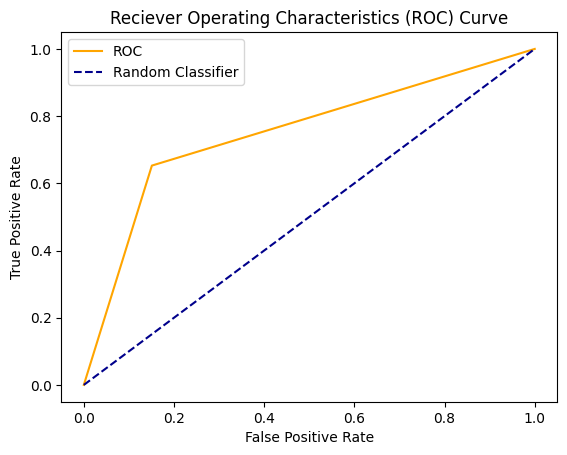

In [42]:
fpr,tpr,thresholds = roc_curve(y_test,nb_y)
plt.plot(fpr,tpr,color = 'orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle= '--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [43]:
auc = roc_auc_score(y_test,nb_y)
auc

0.7509171907756813

## SVM - Support Vector Machines

In [44]:
from sklearn.svm import SVC

In [45]:
svc_model = SVC()
svc_model

SVC()

In [46]:
svc_model.fit(x_train,y_train)
svy = svc_model.predict(x_test)

In [47]:
print("Accuracy score for training - ",accuracy_score(y_train,svc_model.predict(x_train)))
print("Accuracy score for test data - ",accuracy_score(y_test,svy))

Accuracy score for training -  0.7560521415270018
Accuracy score for test data -  0.7792207792207793


In [48]:
confusion_matrix(y_test,svy)

array([[141,  18],
       [ 33,  39]], dtype=int64)

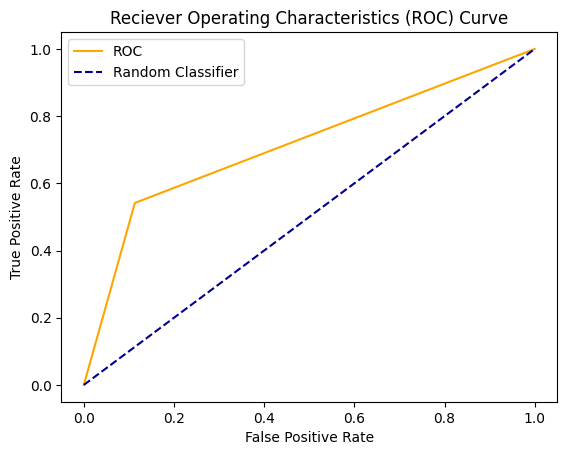

In [49]:
fpr,tpr,thresholds = roc_curve(y_test,svy)
plt.plot(fpr,tpr,color = 'orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle= '--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [50]:
auc = roc_auc_score(y_test,nb_y)
auc

0.7509171907756813

 # Report -

## Comparison among models

### Accuracy score

In [52]:
acc_mat = pd.DataFrame([['Logistic Regression',accuracy_score(y_test,y_pred)],
['KNN',accuracy_score(y_test,y_pred2)],
['Decision Tree',accuracy_score(y_test,dt_y)],
['Naive Bayes',accuracy_score(y_test,nb_y)],
['SVM',accuracy_score(y_test,svy)]])
acc_mat.rename(columns={0:'Classification Model',1:'Accuracy score'})

,Classification Model,Accuracy score
0,Logistic Regression,0.792208
1,KNN,0.766234
2,Decision Tree,0.696970
3,Naive Bayes,0.787879
4,SVM,0.779221


### Comparing `AUC score`

In [53]:
auc_mat = pd.DataFrame([['Logistic Regression',roc_auc_score(y_test,y_pred)],
['KNN',roc_auc_score(y_test,y_pred2)],
['Decision Tree',roc_auc_score(y_test,dt_y)],
['Naive Bayes',roc_auc_score(y_test,nb_y)],
['SVM',roc_auc_score(y_test,svy)]])
auc_mat.rename(columns={0:'Classification Model',1:'AUC score'})

,Classification Model,AUC score
0,Logistic Regression,0.754062
1,KNN,0.716195
2,Decision Tree,0.669680
3,Naive Bayes,0.750917
4,SVM,0.714230


## Conclusion - 
### Accuracy score:
#### -> From these scores, we can see that the highest `accuracy score` is of `Logistic regression` and Naive bayes is second best.


### AUC score
#### -> Finally, looking at the `AUC score`, Logistic regression and Naive Bayes give the best answer
